
train_loss 
epoch 0: 
0.461280227597

validation_loss 
epoch 0: 
0.227846938446

train_loss 
epoch 1: 
0.460864427597

validation_loss 
epoch 1: 
0.227843338446

train_loss 
epoch 2: 
0.460448627597

validation_loss 
epoch 2: 
0.227839738446

train_loss 
epoch 3: 
0.460032827597

validation_loss 
epoch 3: 
0.227836138446

train_loss 
epoch 4: 
0.459617027597

validation_loss 
epoch 4: 
0.227832538446

train_loss 
epoch 5: 
0.459201227597

validation_loss 
epoch 5: 
0.227828938446

train_loss 
epoch 6: 
0.458785427597

validation_loss 
epoch 6: 
0.227825338446

train_loss 
epoch 7: 
0.458369627597

validation_loss 
epoch 7: 
0.227821738446

train_loss 
epoch 8: 
0.457953827597

validation_loss 
epoch 8: 
0.227818138446

train_loss 
epoch 9: 
0.457538027597

validation_loss 
epoch 9: 
0.227814538446

train_loss 
epoch 10: 
0.457122227597

validation_loss 
epoch 10: 
0.227810938446

train_loss 
epoch 11: 
0.456706427597

validation_loss 
epoch 11: 
0.227807338446

train_loss 
epoch 12: 


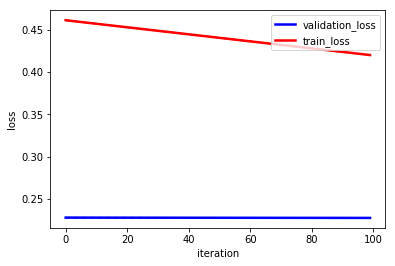

In [6]:
from sklearn.datasets import load_svmlight_file as load
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

def compute_loss(x,y,k):
    n = x.shape[1]
    total = 0
    for z in range(x.shape[0]):
        if np.sum((1 - y[z] * (x[z] * w + b[z]))) > 0:
            total += np.sum((1 - y[z] * (x[z] * w + b[z])))
    loss = np.sum(np.square(w)) / (2*n) + C * total
    print('epoch '+ str(k) + ': ')
    print(loss)
    return loss

#load data
data = load('./australian_scale.txt')
x, y = data[0], data[1]
x_train,x_validation,y_train,y_validation = train_test_split(x,y,test_size=0.33,random_state=0)
x_train,x_validation,y_train,y_validation = x_train.todense(),x_validation.todense(),y_train.reshape(len(y_train),-1),y_validation.reshape(len(y_validation),-1)

#initialize b,w
b = np.zeros((x_train.shape[0],1))
w = np.empty((x_train.shape[1],1))

# training
iteration = 100
learning_rate = 0.9
C = 0.001
train_loss=[] #记录每次迭代的train的loss值
validation_loss=[] #记录每次迭代的validation的loss值

for i in range(iteration):
    for j in range(x_train.shape[0]):
        if np.sum((1 - y_train[j] * (x_train[j] * w + b[j] ))) > 0:
            w_gradient = w + x_train[j].T * C * (-1 * y_train[j])
            b_gradient = -1 * C * y_train[j]
        else:
            w_gradient = w
            b_gradient = 0
        w = w - learning_rate * w_gradient
        b[j] = b[j] - learning_rate * b_gradient
    print('\ntrain_loss ')
    train_loss.append( compute_loss(x_train,y_train,i) )
    print('\nvalidation_loss ')
    validation_loss.append( compute_loss(x_validation,y_validation,i) )

# for plt
t = np.arange(0, iteration, 1)
plt.plot(t, validation_loss, color="blue", linewidth=2.5, linestyle="-", label="validation_loss")
plt.plot(t, train_loss, color="red",  linewidth=2.5, linestyle="-", label="train_loss")
plt.legend(loc='upper right')
plt.plot(t, train_loss, 'r--',t, validation_loss, 'b--')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()